In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("/home/kawahara/exojax/data/clouds/drag_force.txt",comment="#",delimiter=",")

In [55]:
logNre=np.log(data["Nre"].values) #Reynolds number
Cd=(data["Cd_rigid"].values)
logNd=np.log(Nre**2*Cd)

Cdinf=0.45
Nreinf=np.logspace(3,5,30)
logNreinf=np.log(Nreinf)
logNdinf=np.log(Nreinf**2*Cdinf)

In [88]:
coeff=np.polyfit(logNd,logNre,2)
print(coeff)

[-0.00883374  0.84514511 -2.49105354]


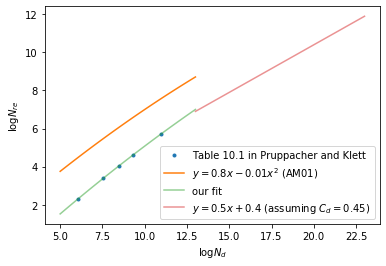

In [107]:
plt.plot(logNd,logNre,".",label="Table 10.1 in Pruppacher and Klett")
xarr=np.linspace(5,13,100)
plt.plot(xarr,0.8*xarr-0.01*xarr**2,label="$y=0.8x-0.01x^2$ (AM01)")
plt.plot(xarr,-0.00883374*xarr**2+0.84514511*xarr-2.49105354,alpha=0.5,label="our fit")
xarr=np.linspace(13,23,100)
plt.plot(xarr,0.5*xarr+0.4,alpha=0.5,label="$y=0.5x+0.4$ (assuming $C_d=0.45$) ")
plt.xlabel("$\\log{N_d}$")
plt.ylabel("$\\log{N_{re}}$")
plt.legend()
plt.savefig("davies_reynolds.png")